<h1>Training and Validation Data</h1> 


<h2>Objective</h2><ul><li> How to use learning rate hyperparameter to improve your model result.  .</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will learn to select the best learning rate by using validation data.</p>
 
<div>
        1. <a href="#Make-Some-Data">Make Some Data</a><br>
        2. <a href="#Create-a-Linear-Regression-Object-Data-Loader-and-Criterion-Function">Create a Linear Regression Object Data Loader and Criterion Function</a><br>
        3. <a href="#Different-learning-rates-and-Data-Structures-to-Store-results-for-Different-Hyperparameters">Different learning rates and Data Structures to Store results for Different Hyperparameters</a><br>
        4. <a href="#Train-different-modules-for-different-Hyperparameters">Train different modules for different Hyperparameters</a><br>
        5. <a href="#View-Results">View Results</a><br>
</div>


<h2>Preparation</h2>


We'll need the following libraries and set the random seed.


In [1]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

<!-- <h2 id="Makeup_Data">Make Some Data</h2> -->
## Make Some Data


First, we'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.


In [3]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self, train=True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

Create two objects: one that contains training data and a second that contains validation data. Assume that the training data has the outliers. 


In [4]:
train_data = Data()
val_data = Data(train=False)

Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:


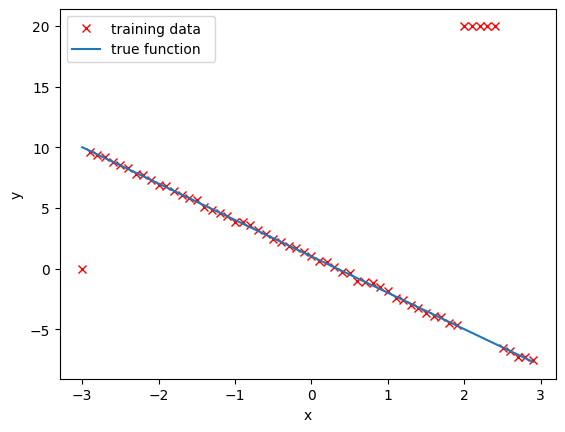

In [5]:
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label="training data")
plt.plot(train_data.x.numpy(), train_data.f.numpy(), label="true function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!-- <h2 id="LR_Loader_Cost">Create a Linear Regression Object,  Data Loader, and Criterion Function</h2> -->
## Create a Linear Regression Object Data Loader and Criterion Function


In [6]:
from torch import nn

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create the criterion function and a <code>DataLoader</code> object: 


In [7]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<!-- <h2 id="LR_Hyper">Different learning rates and Data Structures to Store results for different Hyperparameters</h2> -->
## Different learning rates and Data Structures to Store results for Different Hyperparameters


Create a list with different learning rates and a tensor (can be a list) for the training and validating cost/total loss. Include the list MODELS, which stores the training model for every value of the learning rate. 


In [8]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

<!-- <h2 id="Model">Train different models  for different Hyperparameters</h2> -->
## Train different modules for different Hyperparameters


Try different values of learning rates, perform stochastic gradient descent, and save the results on the training data and validation data. Finally, save each model in a list.


In [9]:
def train_model_with_lr(iter, lr_list):
    for i, lr in enumerate(lr_list):
        model = LinearRegression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)

        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()

        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

<!-- <h2 id="Result">View the Results</h2>
 -->
## View Results


Plot the training loss and validation loss for each learning rate:  


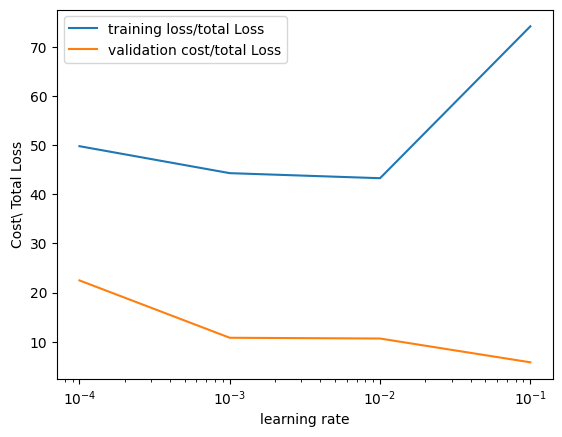

In [10]:
plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

Produce a prediction by using the validation data for each model:  


0 [[1.9077792]
 [1.8816876]
 [1.8555958]]
1 [[5.4500866]
 [5.3329706]
 [5.215854 ]]
2 [[6.593508 ]
 [6.4598475]
 [6.326186 ]]
3 [[14.48129 ]
 [14.046533]
 [13.611774]]


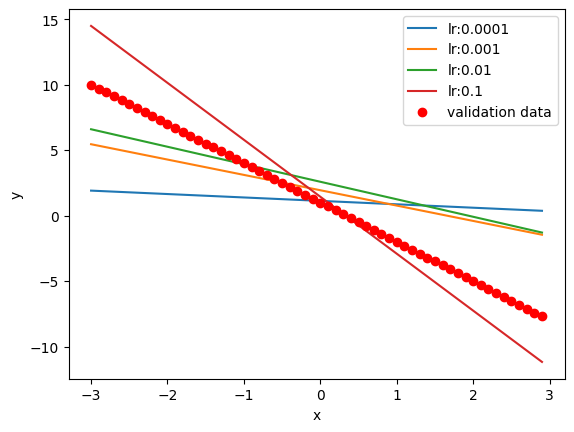

In [11]:
i = 0

for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print(i, yhat.detach().numpy()[0:3])
    i += 1

plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h3>Practice</h3>


The object <code>good_model</code> is the best performing model. Use the train loader to get the data samples x and y. Produce an estimate for <code>yhat</code> and print it out for every sample in a for loop. Compare it to the actual prediction <code>y</code>.


In [16]:
good_model = MODELS[np.argmin(validation_error)]

for x, y in trainloader:
    print(good_model(x).item(), y.item())
    

14.481289863586426 0.0
14.04653263092041 9.590507507324219
13.611774444580078 9.399977684020996
13.177016258239746 9.154001235961914
12.742258071899414 8.783669471740723
12.307500839233398 8.54727554321289
11.872743606567383 8.277819633483887
11.43798542022705 7.767404556274414
11.003227233886719 7.722343444824219
10.568470001220703 7.322057723999023
10.133711814880371 6.896749496459961
9.698954582214355 6.790692329406738
9.264196395874023 6.426082611083984
8.829438209533691 6.0890727043151855
8.39468002319336 5.808246612548828
7.959922790527344 5.68916130065918
7.52516508102417 5.074917793273926
7.090406894683838 4.864490032196045
6.655649185180664 4.563296318054199
6.22089147567749 4.317265033721924
5.786133766174316 3.8160102367401123
5.351375579833984 3.794257640838623
4.9166178703308105 3.552298069000244
4.481860160827637 3.1795055866241455
4.047102451324463 2.8250956535339355
3.612344741821289 2.4738919734954834
3.1775870323181152 2.1707990169525146
2.7428290843963623 1.892542123